# Программирование на Python

# Функции


*Авторы: Анастасия Паршина, Лика Капустина, Даниил Трошин – НИУ ВШЭ*

## Содержание

1. [О модулях и импорте функций](#par1)
2. [Определение собственной функции](#par2)
   1. [Определение функции через `def`](#par2.1)
   2. [Пара слов про аннотации к функции](#par2.2)
   3. [Аргументы функции](#par2.3)
   4. [Глобальные и локальные переменные](#par2.4)
3. [Анонимная функция](#par3)
3. [Про собрата `map()` — `filter()`](#par4)
5. [И снова немного про сортировку](#par5)
6. [Дополнительные материалы](#parlast)

## О модулях и импорте функций <a name="par1"></a>

На самом деле, с функциями мы уже работали. Например, использовали встроенные функции типа `print()`, `len()`, `round()` (они еще подсвечиваются для нас зеленым). Также мы уже импортировали функции из модулей (библиотек), и вот теперь подробнее разберемся о том, как это работает.

Зачастую в модуль объединены сюжетно похожие функции, переменные и инструменты. Например, в модуле `math` хранится все для математических операций. Как узнать, какой модуль нам нужен? Загуглить. Это нормальная практика, никто и не требует от вас знать название всех модулей и функций в этих модулей.

Для примера сейчас импортируем пару функций. Предположим, что нам нужно вычислить квадратный корень.

In [ ]:
import math  # обратились к модулю

Если мы хотим использовать функции из модуля, то так нужно к нему обращаться:

In [ ]:
math.sqrt(25) # вызвали функцию

5.0

Чтобы каждый раз так не делать, можно импортировать сразу необходимые функции (или вообще все):

In [ ]:
# from math import *      # а так можно импортировать вообще все
from math import sqrt, pi # импортировали только функцию sqrt и переменную с числом пи

In [ ]:
sqrt(25)

5.0

In [ ]:
pi

3.141592653589793

Также, если вдруг нужно сократить название модуля, то можно импортировать его под псевдонимом. Посмотрим на модуль `matplotlib.pyplot` для визуализации.

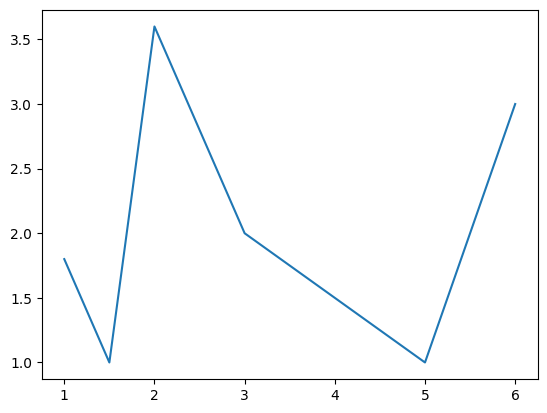

In [1]:
import matplotlib.pyplot as plt # импортируем под псевдонимом plt, и используем дальше этот псевдоним

# X и Y - координаты точек
X = [1, 1.5, 2, 3, 5, 6]
Y = [1.8, 1, 3.6, 2, 1, 3]

plt.plot(X, Y) # рисуем график - последовательно соединяем точки с координатами из X и Y
plt.show()

Также мы можем посмотреть документацию к импортированной функции:

In [ ]:
help(sqrt)

Help on built-in function sqrt in module math:

sqrt(x, /)
    Return the square root of x.



Обратите внимание, что мы видим при работе функции (по крайней мере пока):
    
   + у нее есть название (как бы очевидно это ни было) — `sqrt`
   + мы ей что-то «скармливаем», то есть подаем в качестве аргумента — `25`
   + и она нам что-то возвращает — `5.0`

   + и можно также прописать документацию

Нам ничего не мешает написать что-то такое же.

## Определение собственной функции <a name="par2"></a>

### Определение функции через `def` <a name="par2.1"></a>

По следам КР сделаем функцию, которая по году определяет его век.

In [2]:
def century(year):
    return (year - 1) // 100 + 1

Итак, у нас есть:
+ название функции — `century`
+ аргумент — `year`
+ возвращаемое значение — `(year - 1) // 100 + 1`

Проверим работу функции:

In [5]:
year = int(input())
print(century(year))

2001
21


Давайте теперь сделаем функцию, которая возведет некое число в степень, которую мы хотим. Я намеренно назову её `sqrt`, и посмотрим, как оно будет работать с функцией, которую мы импортировали ранее. Но вообще к названиям функций применимы все те правила, которые применимы к названиям переменных.

In [ ]:
def sqrt(number, degree):
    '''
    number — число, которое возведется в степень degree
    '''
    return number ** degree

У нас снова есть:
+ название — `sqrt`
+ два аргумента — `number`, `degree`
+ возвращаемое значение — `number ** degree`
+ через три апострофа можно также прописать строку документации, объясняющую, что делает функция

Вроде бы должно работать. Но сначала проверим, работает ли функция, которую мы импортировали из модуля `math`:

In [ ]:
sqrt(25)

TypeError: sqrt() missing 1 required positional argument: 'degree'

Ошибка указывает на то, что отсутствует второй аргумент нашей функции. Делаем вывод, что, назвав функцию `sqrt`, мы забыли о той, которая берет квадратный корень. Работает все также, как и с переменными.

In [ ]:
sqrt(2, 8) # возвели 2 в 8 степень

256

Обратите внимание, что поменять местами аргументы можно, но тогда мы возведем 8 в степень 2.

Либо, если мы знаем, как называются аргументы, то мы можем точно указать, какое значение принимает каждый.

In [ ]:
sqrt(degree = 8, number = 2) # возвели 2 в 8 степень

256

Откуда узнать названия аргументов? Это прописывают в документации. К слову, у нашей функции она тоже есть:

In [ ]:
help(sqrt)

Help on function sqrt in module __main__:

sqrt(number, degree)
    number — число, которое возведется в степень degree



Но как проконтролировать, что нашей функции скормлено именно число?

In [ ]:
sqrt('2', 8)

TypeError: unsupported operand type(s) for ** or pow(): 'str' and 'int'

Обратите внимание, на каком моменте возникла ошибка — функция съела все, что мы ей дали, но выдала ошибку, когда попыталась возвести строку в степень.

Конечно, можно проверять тип данных через условную конструкцию (обратите внимание на два `return`, подумайте, как они работают):

In [ ]:
def sqrt(number, degree):
    '''
    number — число, которое возведется в степень degree
    '''
    if type(number) == int and type(degree) == int: # тут еще и float быть может, но пока опустим это
        return number ** degree
    return 'Неправильный тип данных'

In [ ]:
sqrt('2', 8)

'Неправильный тип данных'

Но это очень длинно. Можно просто заранее указать, какой тип данных ожидается у функции на входе и какой тип данных она выдает на выходе.

### Аргументы функции <a name="par2.3"></a>

Об этом мы уже начали говорить. Добавим лишь то, что при объявлении функции можно выставить какое-то дефолтное значение аргумента, которое будет подставяться, если мы ничего не указали.

In [ ]:
def get_degree(number, degree = 2):
    '''
    number — число, которое возведется в степень degree
    '''
    return number ** degree

Например, сейчас, если я вызову функцию, не подставив второй аргумент, то по умолчанию вместо него будет стоять 2.

In [ ]:
get_degree(5)

25

In [ ]:
get_degree(5, 3)

125

Помимо таких нюансов, есть еще возможность передавать функции неограниченное число *неименованных* аргументов (тут нам поможет знак `*`).

In [ ]:
def our_sum(*args): # args = arguments
    return args

print(our_sum(1, 9, 'qwerty', 8))

(1, 9, 'qwerty', 8)


В итоге все наши аргументы преобразовались в один — кортеж, итерируемый объект, с которым дальше можно делать все, что хотим.

In [ ]:
def our_sum(*args): # args = arguments
    summa = 0

    for var in args:
        summa += var

    return summa

print(our_sum(1, 9, 3, 8))

21


Именнованные аргументы также можно передать, но для этого мы используем уже два знака `**`.

In [ ]:
def welcome(**kwargs): # kwargs = keyword arguments

    for key, value in kwargs.items():
        print(f'{key} — {value}')

    print(f'Добро пожаловать, {" ".join(kwargs.values())}')

welcome(name = 'Anastasia', surname = 'Parshina')

name — Anastasia
surname — Parshina
Добро пожаловать, Anastasia Parshina


Обратите внимание, что мы написали функцию, которая ничего не возвращает, а только печатает. Такие функции тоже бывают, как, например, бывают и те, которым не передаются какие либо аргументы. Чем больше вы с ними работаете и пишете свои собственные функции, тем больше узнаете!

<center><b><font size=4>Задача №1</font></b></center>

**Напишите три функции и проаннотируйте переменные, которые они принимают на вход:**

**Функция 1. Создайте функцию `return_gpa()`**, которая принимает на вход последовательность с оценками студента по дисциплине и возвращает его средний балл.

Пример работы:
```
print(return_gpa((10, 5, 0))) # 5.0
print(return_gpa((10, 9, 9, 8, 10))) # 9.2
print(return_gpa((5, 5, 6, 10))) # 6.5
```

**Функция 2. Создайте функцию `return_last_name()`**, которая должна принимать на ход ФИО студента в формате `Фамилия Имя Отчество` и возвращать его фамилию.

Пример работы:
```
print(return_last_name('Музыка Кирилл Дмитриевич') # Музыка
print(return_last_name('Паршина Анастасия Алексеевна') # Паршина
print(return_last_name('Капустина Лика Владимировна') # Капустина
```

**Функция 3. Создайте функцию `return_only_digits()`**, которая должна принимать на вход номер телефона в любом формате (например, `8-800-555-35-35` или `8(800)555-35-35`) и возвращать только цифры.

Пример работы:
```
print(return_only_digits('8-800-555-35-35')) # 88005553535
print(return_only_digits('8(800)555-35-35')) # 88005553535
print(return_only_digits('+7-(800)-555-35-35-')) # 88005553535
```

In [ ]:
# YOUR CODE HERE

### Глобальные и локальные переменные <a name="par2.4"></a>

Простыми словами: локальные переменные — это те, которые создаются внутри функции.

In [ ]:
def our_sum(number):
    summa = 0

    for var in range(1, number+1):
        summa += var

    print(summa)
    return summa

#print(summa)

summa = 10   # глобальная переменная
print(summa)

our_sum(3)  # здесь напечаталось 6
print(summa)

10
6
10


Где это может пригодиться? Представьте, что вы пишете приложение и хотите, чтобы оно приветствовало пользователя в зависимости от выбранного языка.

Предположим, что опции всего две: `ru` и `eng`, а если введено что-то еще, то функция взывается снова (к слову, это называется рексурсия).

In [ ]:
def welcome2(name, language):
    if language == 'ru':
        print("Добро пожаловать,", name)
    elif language == 'eng':
        print('Welcome,', name)
    else:
        print('Wrong language! Try again!')
        language = input()
        welcome2(name, language)

welcome2('Anasasia', 'e')

Wrong language! Try again!
fr
Wrong language! Try again!
eng
Welcome, Anasasia


Но если это приложение, то язык там может быть задействован не только в приветствии, а указывать каждый раз новое значение языка как-то слошком не рационально.

Важно помнить, что глобальные переменные доступны только для чтения, но не для модификации изнутри функции.

Ситуация, при которой функция модифицирует глобальную переменную, обычно не очень желательна: функции должны быть изолированы от кода, который из запускает, иначе вы быстро перестанете понимать, что делает ваша программа.

In [ ]:
def welcome3(name):
    global language
    if language == 'ru':
        print("Добро пожаловать,", name)
    elif language == 'eng':
        print('Welcome,', name)
    else:
        print('Wrong language! Try again!')
        language = input()
        welcome3(name)

language = 'fr'
welcome3('Анастасия')

print(language)

Wrong language! Try again!
en
Wrong language! Try again!
ru
Добро пожаловать, Анастасия
ru


Могли ли мы также поступить с нашей переменной `summa`?

In [ ]:
def our_sum2(number):

    for var in range(1, number+1):
        summa += var

    print(summa)
    return summa

summa = 0
our_sum2(10)

UnboundLocalError: local variable 'summa' referenced before assignment

На нас справделиво ругаются, что мы хотим поменять что-то глобальное. Но если мы все-таки упрямые и очень хотим, то слово `global` в помощь.

In [ ]:
def our_sum3(number):
    global summa
    for var in range(1, number+1):
        summa += var

    print(summa)
    return summa

summa = 0
our_sum3(10)

55


55

В таком случае она сработает, но! при повторном применении будет прибавлять что-то уже к 55.

In [ ]:
our_sum3(3)

61


61

## Анонимная функция <a name="par3"></a>

А вот ее мы тоже уже встречали! Помните про слово `lambda`? Так вот тут будет речь о нем.

Бывает такое, что функция потребуется нам всего раз — здесь и сейчас. Тогда зачем нам как-то ее определять и давать ей название? Можно просто это название заменить словом `lambda`.

`lambda`-функции принимают любое количество аргументов, но не могут содержать несколько выражений и всегда возвращают только одно значение.

Отдельно синтаксис `lambda`-функций покажется вам странным, но выглядит он так:

    `(lambda arguments: exprission)(data)`
    
Идея такая:

+ `arguments` — аргументы, с которыми работает функция
+ `exprission` — что функция с этими аргументами должна делать
+ `data` — какие значения эти аргументы принимают

In [ ]:
(lambda var1, var2, var3: (var1 + var2) * var3)(1, 2, 3)

9

А вот аналогичное действие, только с созданием функции через `def`:

In [ ]:
def new_func(var1, var2, var3):
    return (var1 + var2) * var3

new_func(1, 2, 3)

9

Условные конструкции с ней также работают (но только простой `if-else`):

In [ ]:
(lambda *args: [arg for arg in args if arg % 2 == 0])(1, 2, 3)

[2]

Тут нам помогло списковое включение, и фактически `lambda` вернула один объект — список.

`lambda`-функции очень часто применяются для преобразования каких-то коллекций через функцию `map()`.

In [ ]:
numbers = [12, 31, 42, 16]

list(map(lambda x: x if x % 2 == 0 else 0, numbers))

[12, 0, 42, 16]

<center><b><font size=4>Задача №2</font></b></center>

**Напишите анонимную функцию, которая принимает на вход строку с id студента и возвращает информацию о нем в формате `Номер группы: Фамилия`**

Пример работы функции:
```
codes = ['БПЛПТЛ_232_Иванов Иван Иванович',
        'БМКС_234_Петров Петр Петрович',
        'БЭК_211_Ефимов Ефим Ефимович']
list(map(... , codes)) # ['232: Иванов', '234: Петров', '211: Ефимов']
```

In [ ]:
codes = ['БПЛПТЛ_232_Иванов Иван Иванович',
        'БМКС_234_Петров Петр Петрович',
        'БЭК_211_Ефимов Ефим Ефимович']
# YOUR CODE HERE

## Про собрата `map()` — `filter()` <a name="par4"></a>

Если мы хотим отфильтровать данные, то нам поможет функция `filter()`.

In [ ]:
# старый дедовский способ

numbers = [2, 5, 2, 1, 9, 8, 10]
res = []

for num in numbers:
    if num % 2 == 0:
        res.append(num)

print(res)

[2, 2, 8, 10]


In [ ]:
# аналогично, но через списковые включения

numbers = [2, 5, 2, 1, 9, 8, 10]
res = [num for num in numbers if num % 2 == 0]

print(res)

[2, 2, 8, 10]


In [ ]:
# с помощью функции filter()

numbers = [2, 5, 2, 1, 9, 8, 10]
res = list(filter(lambda num: num % 2 == 0, numbers))

print(res)

[2, 2, 8, 10]


Фактически, мы здесь фильтруем по *условию*, не заморачиваясь с использованием цикла.

## И снова немного про сортировку <a name="par5"></a>

Напомним, что сортировка в Python реализуется с помощью функции `sorted` (для **любого итерируемого объекта**: списка, кортежа, множества, словаря и т.п.) или с помощью метода **списков** `sort`.

In [ ]:
l1 = [4, 5, 2, 1, 3]
print(sorted(l1)) # не изменяет список
l1.sort() # изменяет сам список, поэтому далее выводим l1
print(l1)

[1, 2, 3, 4, 5]
[1, 2, 3, 4, 5]


По умолчанию сортировка выполняется по возрастанию (в случае со строками — по алфавиту). Но можно задать порядок сортировки с помощью функции (если нам нужно отсортировать каким-то хитрым способом). Делается это так:

In [ ]:
l1 = [5, -4, 3, -1, 2]
print(sorted(l1, key=abs)) # у нас есть отрицательные и положительные числа, сортируем по модулю с помощью функции abs
l1.sort(key=abs)
print(l1)

[-1, 2, 3, -4, 5]
[-1, 2, 3, -4, 5]


Это мы уже знаем. А теперь посмотрим, что можно использовать не только встроенные функции, но и задавать свои – как раз с помощью лямбда-функций.

In [7]:
l1 = ['г. Москва', 'г. Санкт-Петербург', 'г. Нижний Новгород', 'г. Пермь']
print(sorted(l1, key=lambda s: s[3])) # отсортируем по 3-му символу – первой букве названия города
l1.sort(key=lambda s: s[3])
print(l1)

['г. Москва', 'г. Нижний Новгород', 'г. Пермь', 'г. Санкт-Петербург']
['г. Москва', 'г. Нижний Новгород', 'г. Пермь', 'г. Санкт-Петербург']


## Дополнительные материалы <a name="parlast"></a>

+ Разница между методом и функцией [Python for Data Science](https://pythonru.com/osnovy/3-python-dlja-data-science-vstroennye-funkcii-i-metody-python)
+ Документация Python [Built-in Functions](https://docs.python.org/3/library/functions.html)
+ Документация Python [Support for type hints](https://docs.python.org/3/library/typing.html)
+ Введение в аннотации типов Python [Статья на Хабр](https://habr.com/ru/company/lamoda/blog/432656/)
+ Что такое \*args и \*\*kwargs в Python? [Статья на Хабр](https://habr.com/ru/company/ruvds/blog/482464/)